In [2]:
%use

Subkernel,Kernel Name,Language,Language Module,Interpreter
Python3,python3,python,sos_python,python
R,ir,R,sos_r,R
Julia,julia-1.8,julia,sos_julia,/opt/julia-1.8.5/bin/julia
Markdown,markdown,markdown,,/opt/conda/bin/python
Octave,octave,octave,sos_matlab,python
SoS,sos,sos,,/opt/conda/bin/python


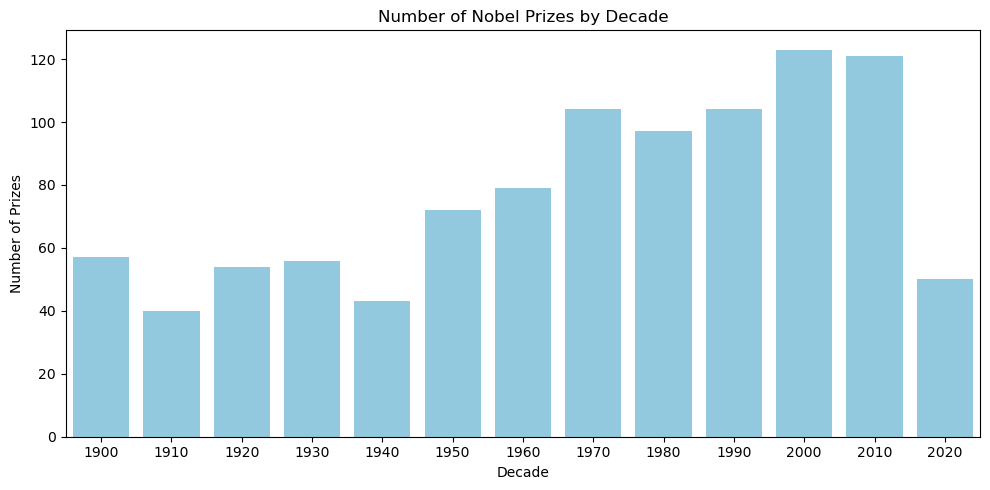

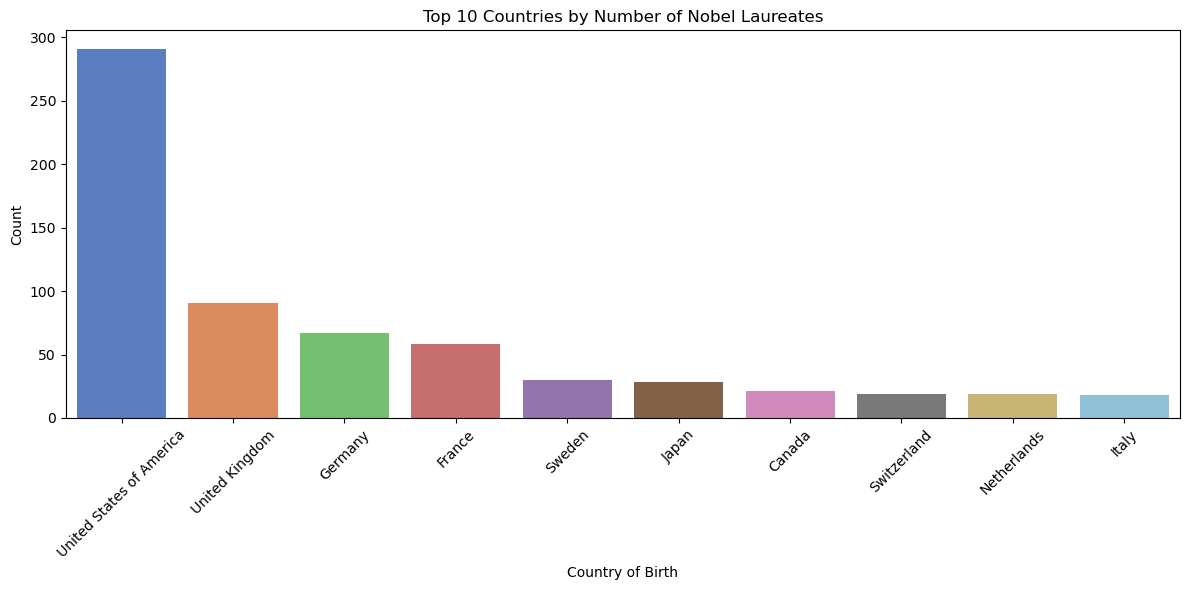

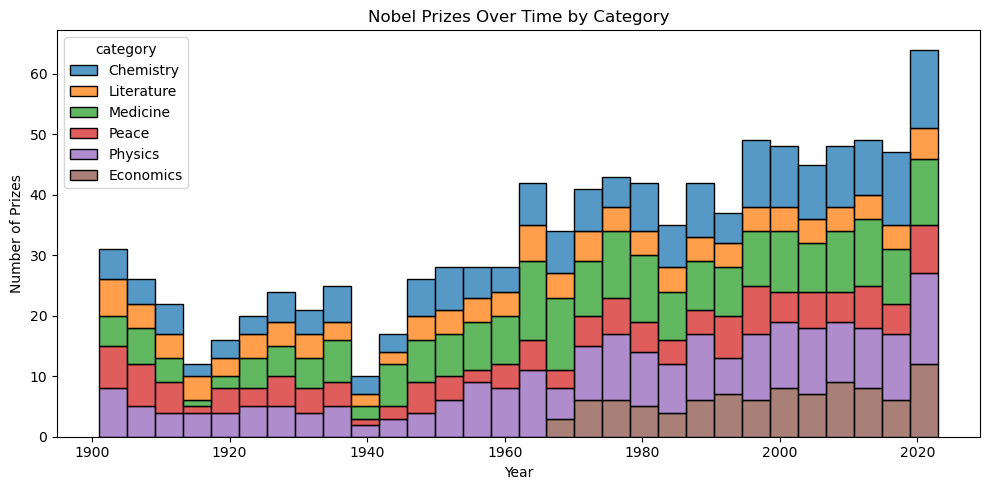

In [41]:
%use python3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("nobel.csv")

# --- Plot 1: Number of Nobel Prizes by Decade ---
df['decade'] = (df['year'] // 10) * 10
decade_counts = df['decade'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=decade_counts.index, y=decade_counts.values, color="skyblue")
plt.title("Number of Nobel Prizes by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Prizes")
plt.tight_layout()
plt.show()


# --- Plot 2: Top 10 Countries by Laureate Count ---
plt.figure(figsize=(12, 6))
top_countries = df['birth_country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="muted")
plt.title("Top 10 Countries by Number of Nobel Laureates")
plt.xlabel("Country of Birth")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Plot 4: Nobel Categories Over Time ---
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='year', hue='category', multiple='stack', palette='tab10', bins=30)
plt.title("Nobel Prizes Over Time by Category")
plt.xlabel("Year")
plt.ylabel("Number of Prizes")
plt.tight_layout()
plt.show()


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 1000 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): category, prize, motivation, prize_share, laureate_type, full_nam...
dbl   (2): year, laureate_id
date  (2): birth_date, death_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Removed 44 rows containing non-finite values (`stat_bin()`).”


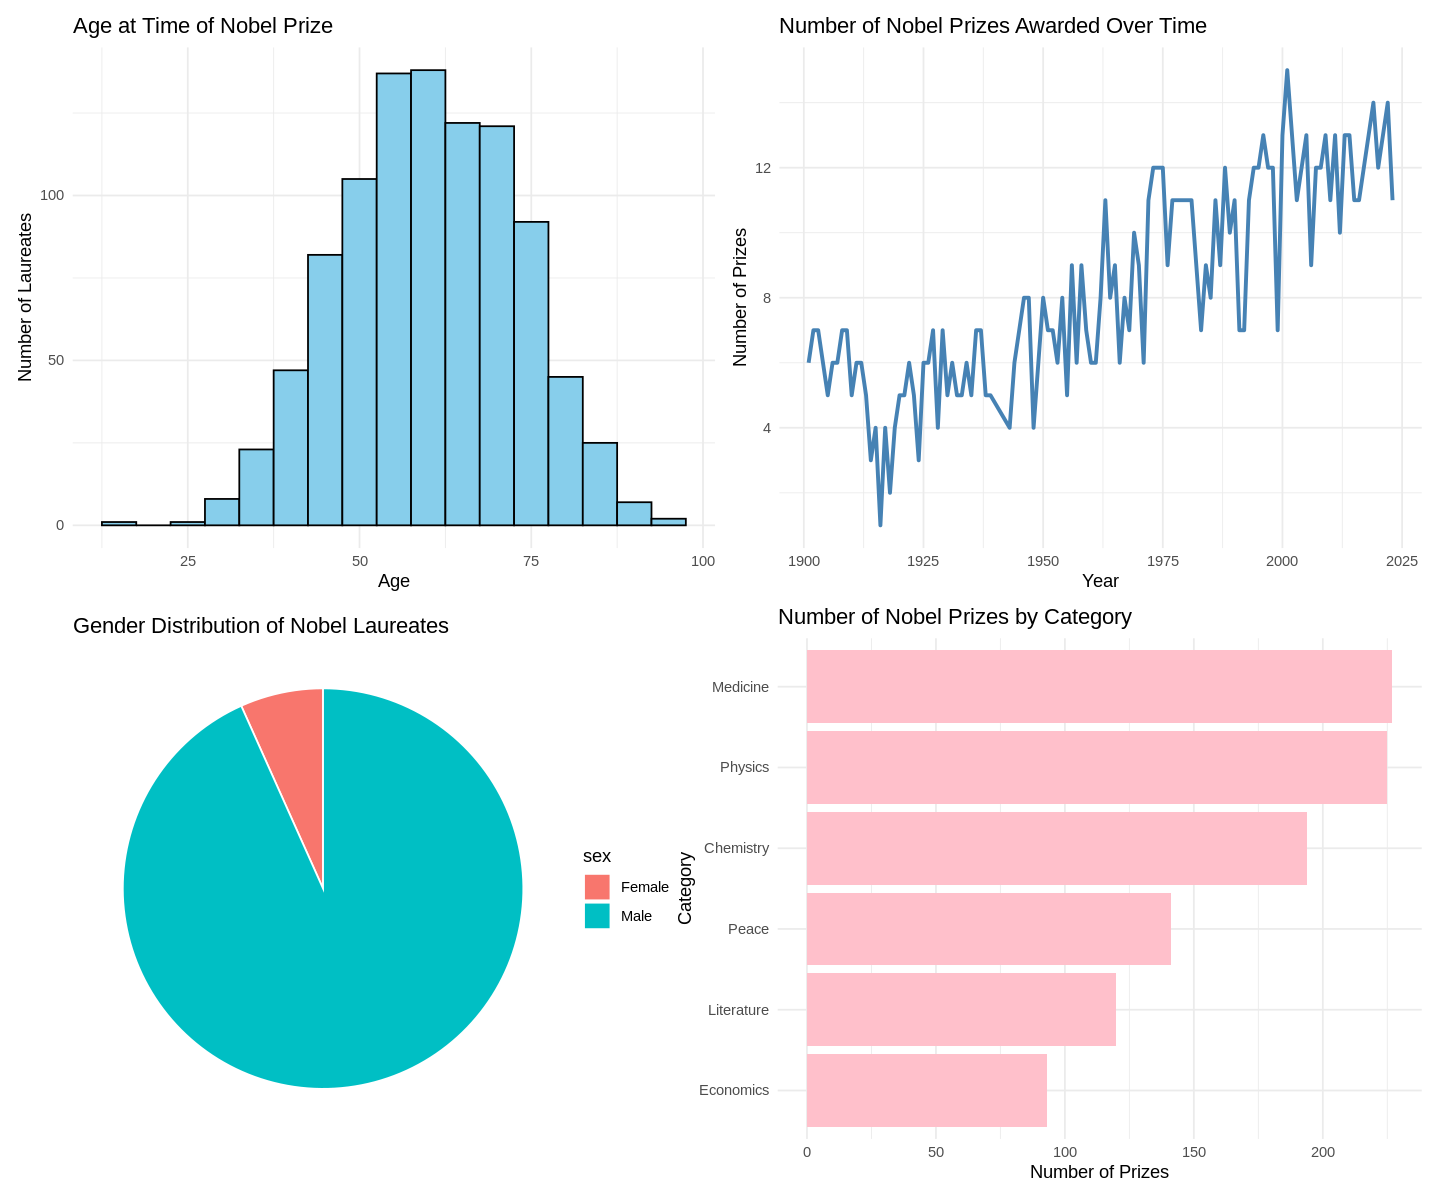

In [43]:
%use R
options(repr.plot.width = 12, repr.plot.height = 10)

library(ggplot2)
library(dplyr)
library(readr)
library(lubridate)
library(patchwork)

# Load and clean
df <- read_csv("nobel.csv")
names(df) <- make.names(names(df))

# Compute age at award
df <- df %>%
  mutate(birth_year = year(birth_date),
         age = year - birth_year)

# === 1. Age at Time of Award (Histogram) ===
p1 <- ggplot(df, aes(x = age)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
  labs(title = "Age at Time of Nobel Prize",
       x = "Age", y = "Number of Laureates") +
  theme_minimal()

# === 2. Prizes Awarded Over Time ===
p2 <- df %>%
  count(year) %>%
  ggplot(aes(x = year, y = n)) +
  geom_line(color = "steelblue", linewidth = 1.1) +
  labs(title = "Number of Nobel Prizes Awarded Over Time",
       x = "Year", y = "Number of Prizes") +
  theme_minimal()

# === 3. Gender Distribution (Pie) ===
gender_counts <- df %>% count(sex) %>% filter(!is.na(sex))
p3 <- ggplot(gender_counts, aes(x = "", y = n, fill = sex)) +
  geom_col(width = 1, color = "white") +
  coord_polar(theta = "y") +
  labs(title = "Gender Distribution of Nobel Laureates") +
  theme_void()

# === 4. Count by Category (Horizontal Bar) ===
p4 <- df %>%
  count(category) %>%
  mutate(category = reorder(category, n)) %>%
  ggplot(aes(x = n, y = category)) +
  geom_col(fill = "pink") +
  labs(title = "Number of Nobel Prizes by Category",
       x = "Number of Prizes", y = "Category") +
  theme_minimal()

# === Combine ===
(p1 | p2) / (p3 | p4)
